In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.3 MB/s 
     |████████████████████████████████| 11.2 MB 45.7 MB/s 
     |████████████████████████████████| 96 kB 5.6 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 965 kB 58.2 MB/s 
     |████████████████████████████████| 1.1 MB 20.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3f514887f3efed246dd6164d38ebc823cdaa6d5da01d48d26f45e21c93cd66e0
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a346a52bdd398eab5082b059fbdc2800277f7b6c508b79a221d58be94465320f
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.8


In [3]:
adata = sc.read_h5ad("./drive/MyDrive/immune_cell_dataset/myeloid/myeloid.h5ad")
adata.X.shape

(51552, 36601)

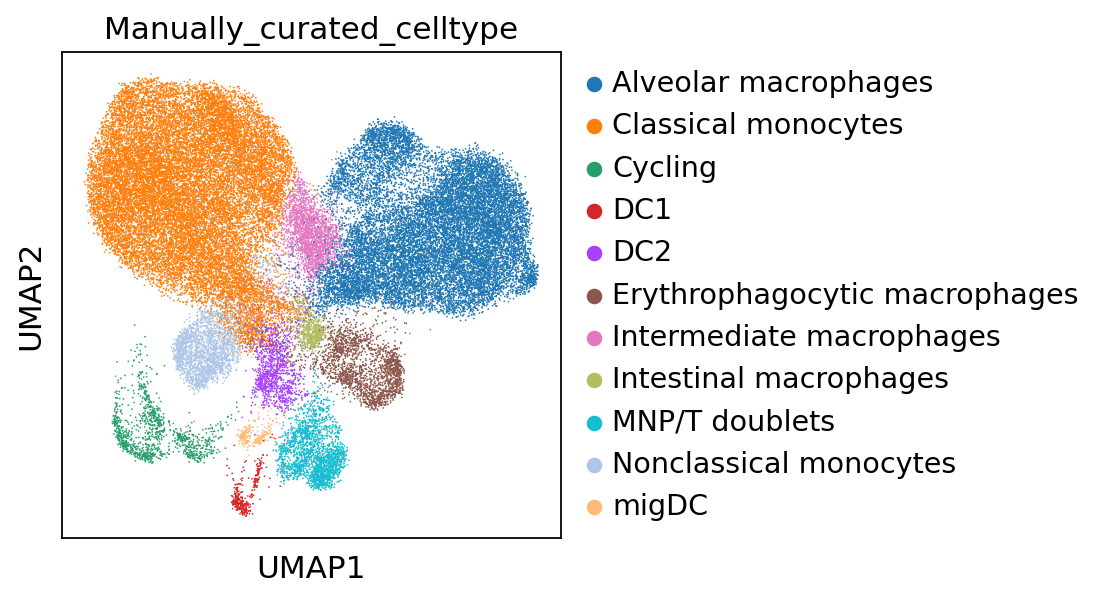

In [4]:
sc.pl.umap(adata, color='Manually_curated_celltype', use_raw=False)

In [5]:
adata.X

<51552x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 144809505 stored elements in Compressed Sparse Row format>

In [6]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

Directory for writing results to

In [7]:
!mkdir figures

Preprocessing

I skipped a lot of steps because the umap included all 329762 cells.

In [ ]:
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             # jitter=0.4, multi_panel=True)

In [ ]:
# sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
# adata = adata[adata.obs.n_genes_by_counts < 2500, :]
# adata = adata[adata.obs.pct_counts_mt < 5, :]

The matrix has already been normalized and logarithmized.

In [ ]:
# sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
# sc.pp.log1p(adata)

Selecting Highly Variable Genes

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [15]:
print("Number of non-highly variable genes:", sum(adata.var['highly_variable']==False))

# Genes listed in the marker genes figure for the myeloid subset
myeloid_genes = ["CD74",
                 "HLA-DRA",
                 "CLEC9A",
                 "DNASE1L3",
                 "IDO1",
                 "XCR1",
                 "CLEC10A",
                 "CD1C",
                 "PKIB",
                 "FSCN1",
                 "LAMP3",
                 "CCR7",
                 "CD14",
                 "FCGR3A",
                 "C1QA",
                 "CRISPLD2",
                 "CLU",
                 "MARC1",
                 "CDKN1C",
                 "ZNF703",
                 "CX3CR1",
                 "GPNMB",
                 "TREM2",
                 "BHLHE41",
                 "TNIP3",
                 "CCL2",
                 "SPP1",
                 "SELENOP",
                 "CD5L",
                 "SPIC",
                 "SLC40A1",
                 "VCAM1",
                 "CXCL12",
                 "CD209",
                 "SDS",
                 "IGF1",
                 "MKI67",
                 "CD3E"]
print("Number of highly variable genes:", sum(adata.var["highly_variable"]==True))
print("Number of myeloid genes:", len(myeloid_genes))

# Genes explicitly mentioned in the description for myeloid cells
special_myeloid_genes = {"GPNMB": ("macrophage", "alveolar"),
                         "TREM2": ("macrophage", "alveolar"),
                         "TNIP3": ("macrophage", "intermediate"),
                         "CCL2": ("macrophage", "intermediate"),
                         "CD5L": ("macrophage", "erythrophagocytic"),
                         "SLC40A1": ("macrophage", "erythrophagocytic"),
                         "SPIC": ("macrophage", "erythrophagocytic"),
                         "CD209": ("macrophage", "gut"),
                         "IGF1": ("macrophage", "gut"),
                         "CD14": ("monocyte", "classical"),
                         "FCGR3A": ("monocyte", "nonclassical"),
                         "CX3CR1": ("monocyte", "nonclassical"),
                         "XCR1": ("dendritic", "DC1"),
                         "CLEC9A": ("dendritic", "DC1"),
                         "CD1C": ("dendritic", "DC2"),
                         "CLEC10A": ("dendritic", "DC2"),
                         "CCR7": ("dendritic", "migDC"),
                         "LAMP3": ("dendritic", "migDC"),
                         "AIRE": ("dendritic", "migDC"),
                         "PDLIM4": ("dendritic", "migDC"),
                         "EBI3": ("dendritic", "migDC"),
                         "CRLF2": ("dendritic", "migDC")}

# for gene in myeloid_genes:
  # print(adata.var["highly_variable"][gene])

for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    print(gene, "mentioned in description of myeloid genes subset but not shown in chart")
    print(gene + " associated with", special_myeloid_genes[gene])

Number of non-highly variable genes: 34785
Number of highly variable genes: 1816
Number of myeloid genes: 38
AIRE mentioned in description of myeloid genes subset but not shown in chart
AIRE associated with ('dendritic', 'migDC')
PDLIM4 mentioned in description of myeloid genes subset but not shown in chart
PDLIM4 associated with ('dendritic', 'migDC')
EBI3 mentioned in description of myeloid genes subset but not shown in chart
EBI3 associated with ('dendritic', 'migDC')
CRLF2 mentioned in description of myeloid genes subset but not shown in chart
CRLF2 associated with ('dendritic', 'migDC')


In [ ]:
adata.var["highly_variable"]["CRLF2"]

False

In [16]:
present = []
absent = []
for gene in myeloid_genes:
  if adata.var["highly_variable"][gene]:
    present.append(gene)
  else:
    absent.append(gene)

for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    print(gene + " not present in myeloid_genes")
    if adata.var["highly_variable"][gene]:
      present.append(gene)
    else:
      absent.append(gene)

print("Number of genes present in highly variable genes:", len(present))
print("Number of genes absent in highly variable genes:", len(absent))
print("Genes absent:", absent)
# Genes missing in highly variable genes that were specifically mentioned in description
for gene in absent:
  if gene in special_myeloid_genes:
    print(gene, special_myeloid_genes[gene])

AIRE not present in myeloid_genes
PDLIM4 not present in myeloid_genes
EBI3 not present in myeloid_genes
CRLF2 not present in myeloid_genes
Number of genes present in highly variable genes: 36
Number of genes absent in highly variable genes: 6
Genes absent: ['CD74', 'HLA-DRA', 'CD14', 'C1QA', 'AIRE', 'CRLF2']
CD14 ('monocyte', 'classical')
AIRE ('dendritic', 'migDC')
CRLF2 ('dendritic', 'migDC')


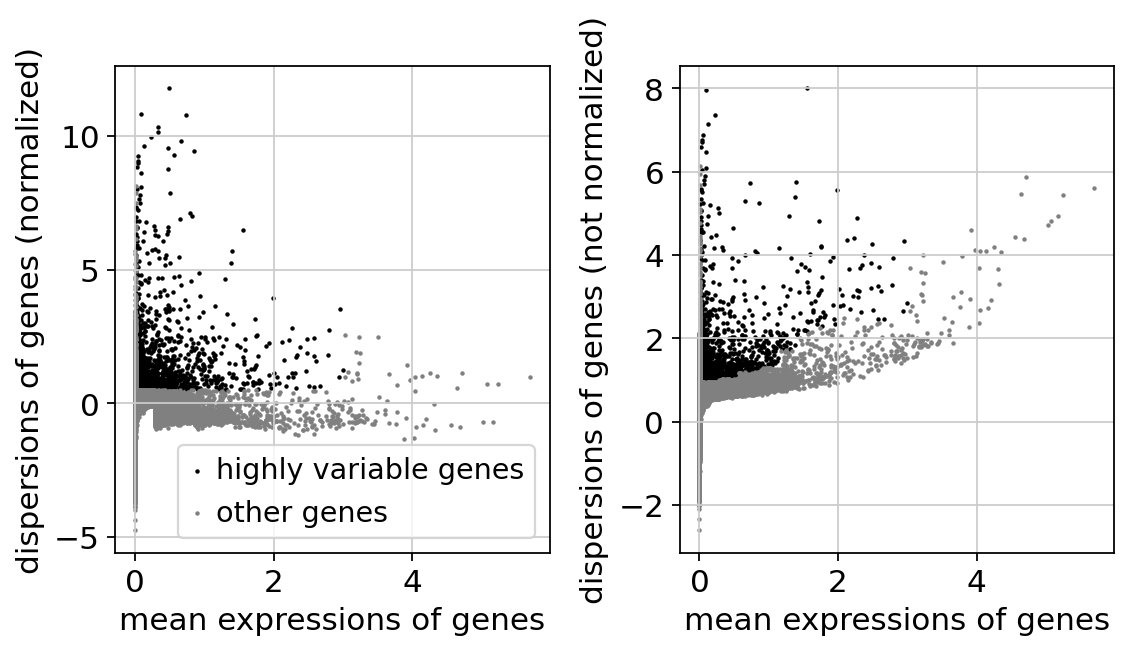

In [17]:
sc.pl.highly_variable_genes(adata, save="_myeloid.png")

In [18]:
adata.raw = adata

In [19]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
# sc.pp.regress_out(adata, ['Chemistry'])

In [20]:
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Integration with donors and removing batch effects of chemistry

In [21]:
!pip3 install bbknn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 3.9 MB/s 
  Created wheel for annoy: filename=annoy-1.17.1-cp37-cp37m-linux_x86_64.whl size=395189 sha256=b95f9dc2cf2030009a692d3453af86245e8e4b7024f2a8544a812d5603c087ad
  Stored in directory: /root/.cache/pip/wheels/81/94/bf/92cb0e4fef8770fe9c6df0ba588fca30ab7c306b6048ae8a54
Successfully built annoy


In [22]:
import bbknn

bbknn.ridge_regression(adata, batch_key=['Chemistry'])

computing ridge regression
	finished: `.X` now features regression residuals
	`.layers['X_explained']` stores the expression explained by the technical effect (0:00:01)


Put X_umap in original_X_umap because otherwise, it is going to be overwritten later.

In [23]:
adata.obsm["original_X_umap"] = adata.obsm["X_umap"]

In [24]:
adata

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg'
    obsm: 'X_umap', 'original_X_umap'
    layers: 'X_explained'

PCA

In [ ]:
def run_pca(adata_object, n_comps, save=True):
  """
  Runs PCA on the adata_object. Saves X_pca and PCs to its own keys so that if PCA
  is run again it will not be overwritten and the results can be reused if save is True.
  """
  sc.tl.pca(adata, svd_solver='arpack', n_comps=n_comps)
  if save:
    print("Saving PCAs")
    adata_object.obsm[str(n_comps)+"_X_pca"] = adata_object.obsm["X_pca"]
    adata_object.varm[str(n_comps)+"_PCs"] = adata_object.varm["PCs"]


run_pca(adata, 100, False)
adata

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:29)


AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'pca'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'

In [ ]:
adata

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'pca'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'

Variance Ratio for PCA

In [ ]:
def compute_variance_ratio(Z, W, X, n_pcs):
  """
  Compute the variance ratio for a mixture of PPCA.
  Z is the transformed data in the latent dimension.
  W is the weights, one weight matrix for each cluster.
  n_pcs is the number of principal components to compute the variance ratio for from 1 to n_pcs.
  R is the responsibility of each cluster for each data point.
  n_clusters is the number of components used in the mixture of PPCA.
  The variance ratio is calculated as ||ZW-X||^_2F/||X||^2_F, where F means the Frobenius norm
  """
  n, d = X.shape
  X_variance = np.linalg.norm(X, 'fro')**2

  variance_ratios = np.zeros(n_pcs,)
  for i in range(0, n_pcs):
    Zi = Z[:, 0:i+1]
    Wi = W[:, 0:i+1]
    # print(Zi.shape)
    # print(Wi.shape)
    reconstruction_difference = np.matmul(Zi, np.transpose(Wi)) - X
    errors_variance = np.linalg.norm(reconstruction_difference, 'fro')**2
    
    variance_ratios[i] = 1 - errors_variance / X_variance - sum(variance_ratios[0:i])
  
  return variance_ratios

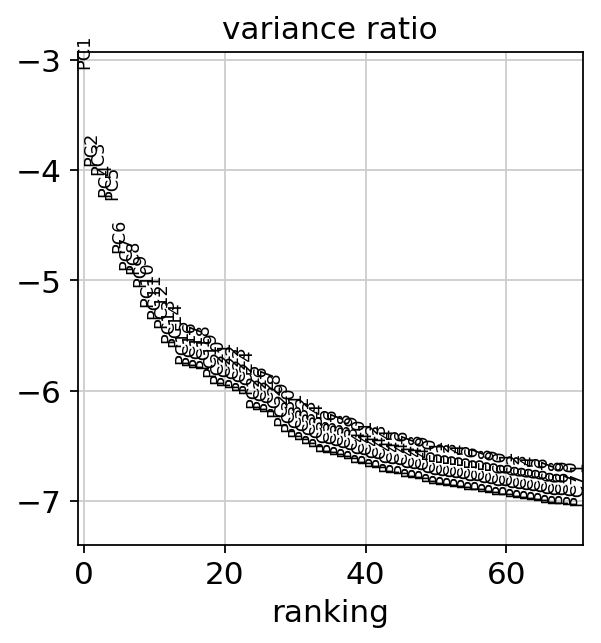

In [ ]:
def show_variance_ratio(adata_object, graph_components, save=False):
  """
  Shows a variance ratio of the PCA with the desired number of components.
  Saves it to a .png file if save is True
  """
  if save:
    sc.pl.pca_variance_ratio(adata, log=True, n_pcs=graph_components, save="_"+str(graph_components)+"_.png")
  else:
    sc.pl.pca_variance_ratio(adata, log=True, n_pcs=graph_components)

show_variance_ratio(adata, graph_components=70, save=True)

In [ ]:
# compute_variance_ratio(adata.obsm["X_pca"], adata.varm["PCs"], adata.X, 100)

In [ ]:
# adata.uns['pca']

Visualizing Top Components of PCA

In [44]:
def get_top_pca_loadings(adata_object, W, component, num_select=15):
  """
  adata_object: The adata object.
  W: The weights.
  component: The index of the principal component to look at. E.g., for the first principal component,
    component should be 0.
  num_select: Number of top and bottom to choose. E.g., 15 will get 30 values back in total.
    The top 15 and the bottom 15.
  An alternative way to get the top loadings as opposed to visualizing it on the graph.
  """
  # print("get_top_pca_loadings()", num_select)
  
  # Get the indices of the array if it were to be sorted
  sorted_indices = np.argsort(W[:,component])
  top = sorted_indices[-1:-num_select-1:-1]
  bottom = sorted_indices[0:num_select]
  # print(W[:,component][top])
  # print(W[:,component][bottom])
  top_loadings = adata_object.var["highly_variable"].iloc[top]
  bottom_loadings = adata_object.var["highly_variable"].iloc[bottom]
  
  return top_loadings, bottom_loadings 

In [45]:
def get_absolute_top_pca_loadings(adata_object, W, component, num_select=15):
  """
  adata_object: The adata object.
  W: The weights.
  component: The index of the principal component to look at. E.g., for the first principal component,
    component should be 0.
  num_select: Number of top. E.g., 15 will get 15 loadings back in total.
  Gets the num_select loadings with the highest absolute value.
  """
  # print("get_absolute_top_pca_loadings()", num_select)
  
  # Get the absolute values of the component W
  absolute_component = np.absolute(W[:,component])
  # Get the indices of the array if it were to be sorted
  sorted_indices = np.argsort(absolute_component)
  top = sorted_indices[-1:-num_select-1:-1]
  top_loadings = adata_object.var["highly_variable"].iloc[top]
  
  return top_loadings 

In [46]:
def get_all_genes(adata_object, W, num_pcs, present_genes, num_select=15, use_absolute=True):
  """
  adata_object: The adata object.
  W: The weights.
  num_pcs: The number of principal components to look for.
  present_genes: The genes to check the presence of.
  num_select: The number of loadings to get. 2*num_select for use_absolute=False.
    num_select for use_absolute=True.
  use_absolute: True if you only want the top values. False if you want to get the bottom and the top.

  Gets the top genes and bottom genes for each principal component then gets the ones
  that are present in present_genes and returns them. Does this for num_pcs.
  """
  
  pc_present = []
  for i in range(0, num_pcs):
    
    if not use_absolute:
      # Get top genes and bottom genes of each principal component
      top, bottom = get_top_pca_loadings(adata_object, W, i, num_select)
    else:
      top = get_absolute_top_pca_loadings(adata_object, W, i, num_select)
    
    # Add in the top genes
    for gene in top.index:
      if gene in present_genes and gene not in pc_present:
        pc_present.append(gene)
    if not use_absolute:
      # Add in the bottom genes
      for gene in bottom.index:
        if gene in present_genes and gene not in pc_present:
          pc_present.append(gene)
  return pc_present

In [ ]:
adata.varm['PCs'].shape

(1816, 100)

Number of loadings: 10
use_absolute: True
Number of principal components: 100




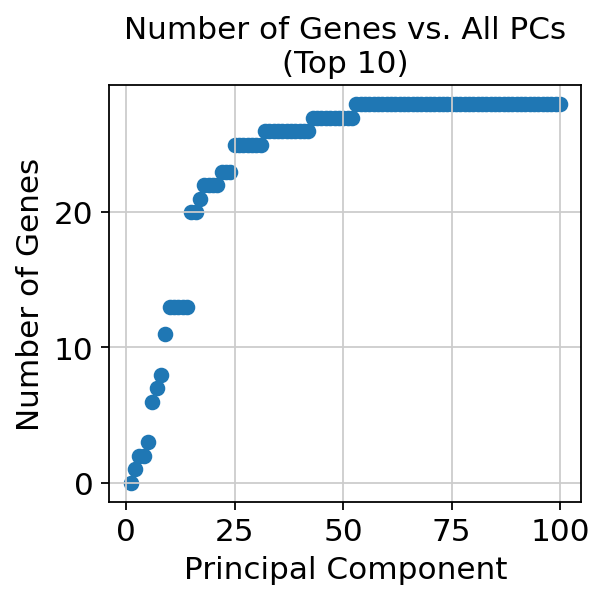

Number of genes chosen with 50 components in top 5: 27
Number of genes chosen with 100 components in top 5: 28
['macrophage', '_', '_', '_', '_', 'macrophage', 'macrophage', '_', 'macrophage', '_', '_', '_', '_', '_', 'macrophage', 'dendritic', 'macrophage', '_', 'dendritic', '_', 'dendritic', 'dendritic', 'macrophage', 'dendritic', '_', '_', 'macrophage']


In [ ]:
num_select = 10
use_absolute = True
num_pcs = 100
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
print("Number of principal components:", num_pcs)
print("\n")

pc_num_genes = {}
for i in range(0, num_pcs):
  selected_genes = get_all_genes(adata,
                                adata.varm['PCs'],
                                i,
                                present_genes,
                                num_select=num_select,
                                use_absolute=use_absolute)
  pc_num_genes[i+1] = selected_genes

plt.scatter([i for i in range(1, num_pcs+1)], [len(pc_num_genes[i]) for i in range(1, num_pcs+1)])
plt.title("Number of Genes vs. All PCs\n(Top " + str(num_select) + ")")
plt.xlabel("Principal Component")
plt.ylabel("Number of Genes")
plt.tight_layout()
plt.savefig("pca_100_genes.png")
plt.show()
plt.close()

print("Number of genes chosen with 50 components in top 5:", len(pc_num_genes[50]))
cell_types = []
for gene in pc_num_genes[50]:
  if gene in special_myeloid_genes:
    cell_types.append(special_myeloid_genes[gene])
  else:
    cell_types.append("_")
print("Number of genes chosen with 100 components in top 5:", len(pc_num_genes[100]))

print(cell_types)

Compute neighbors graph

In [ ]:
adata

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'leiden', 'louvain'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'pca', 'neighbors', 'leiden', 'louvain'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'
    obsp: 'distances', 'connectivities'

In [ ]:
def compute_neighbors_graph(adata_object, n_neighbors, n_pcs, specific_pca=None, save_graph=False):
  """
  Computes a neighbors graph object with n_neighbors for n_pcs.
  If a specific pca is specified such as 100_X_pca or mix_pca then it will use that.
  Warning, that will overwrite adata.obsm['X_pca'].
  save_graph is True to save the results of the graph because it can take a while to run.
  """
  if specific_pca:
    print("Warning, overwriting X_pca with ", specific_pca)
    adata_object.obsm["X_pca"] = adata_object.obsm[specific_pca]
  sc.pp.neighbors(adata_object, n_neighbors=n_neighbors, n_pcs=n_pcs)

  if save_graph:
    print("Need to implement save graph feature")

compute_neighbors_graph(adata, n_neighbors=100, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:48)


In [ ]:
bbknn.bbknn(adata, batch_key="Donor")

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


Clustering Algorithms

Using Leiden Clustering

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sc.tl.leiden(adata, resolution=0.6)

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:48)


In [ ]:
sc.tl.louvain(adata, resolution=0.6)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:01:18)


In [ ]:
print("Computing umap")
sc.tl.umap(adata)

Computing umap
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:23)


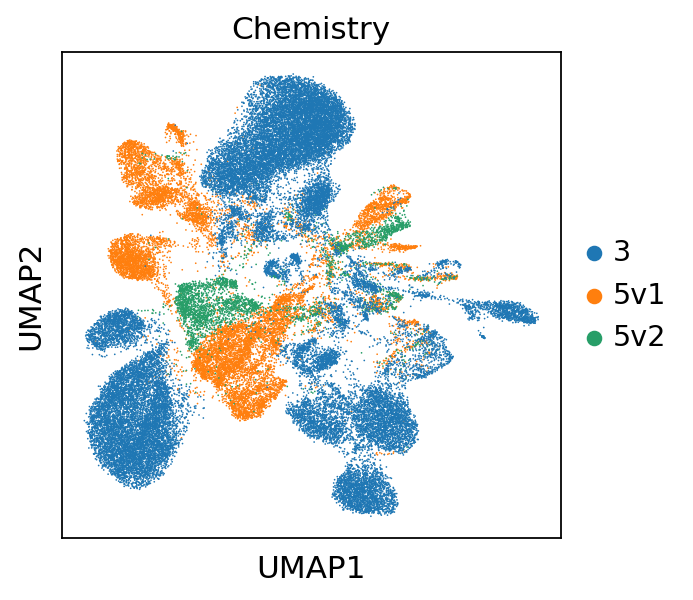

In [ ]:
# sc.pl.umap(adata, color='louvain', save="_pca_bbknn_3_50_0_6_louvain.png")
sc.pl.umap(adata, color='Chemistry', save="_pca_30_40_chemistry.png")

Using K-means Clustering

(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)


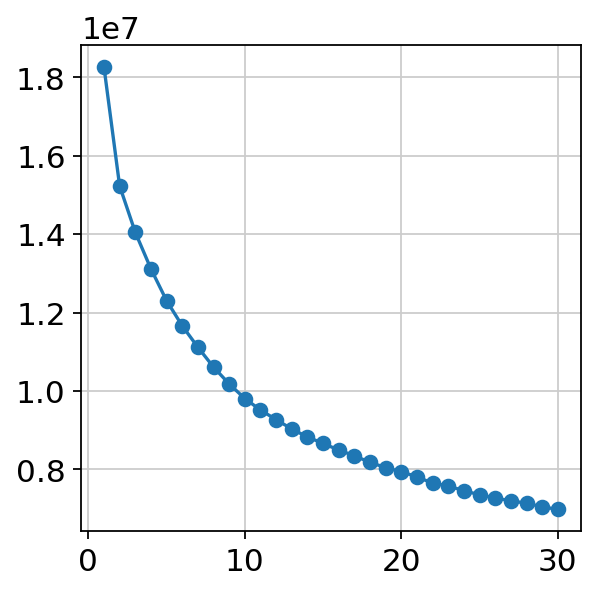

In [ ]:
# K-means
from sklearn.cluster import KMeans

max_clusters = 30
num_PCs = 50
distortions = np.zeros(max_clusters)
labels = []
for i in range(1, max_clusters+1):
  X_pca = adata.obsm["X_pca"][:, 0:num_PCs]
  print(X_pca.shape)
  kmeans = KMeans(n_clusters=i, random_state=0, n_init=20, max_iter=500, tol=1e-04).fit(X_pca)
  
  distortions[i-1] = kmeans.inertia_
  labels.append(kmeans.labels_.astype(str))

plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.savefig("./figures/kmeans_elbow_plot_20_50.png")
# plt.show()
# plt.close()
# adata.obs['kmeans'] = kmeans.labels_.astype(str)
# sc.pl.umap(adata, color=['kmeans9'], save='_pca_8_kmeans.pdf')

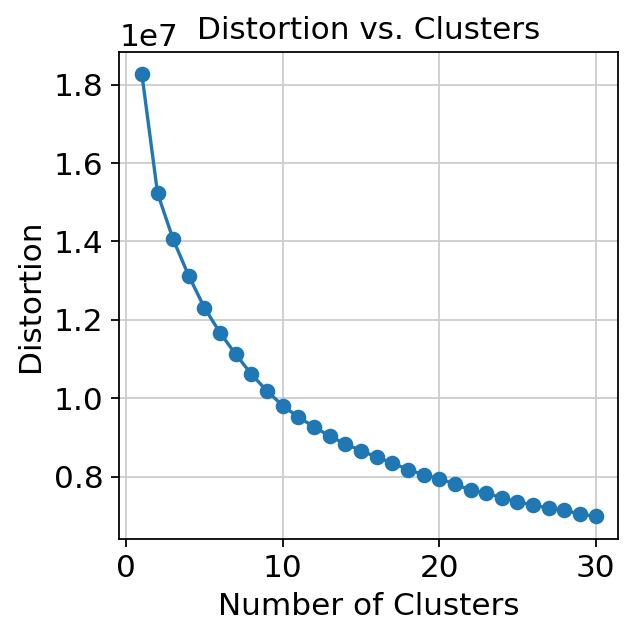

In [ ]:
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Distortion vs. Clusters")
plt.savefig("./figures/kmeans_elbow_plot_30_50.png")
# plt.show()
# plt.close()
# adata.obs['kmeans'] = kmeans.labels_.astype(str)
# sc.pl.umap(adata, color=['kmeans9'], save='_pca_8_kmeans.pdf')

In [ ]:
adata.obsm['X_umap'] = adata.obsm['original_X_umap']

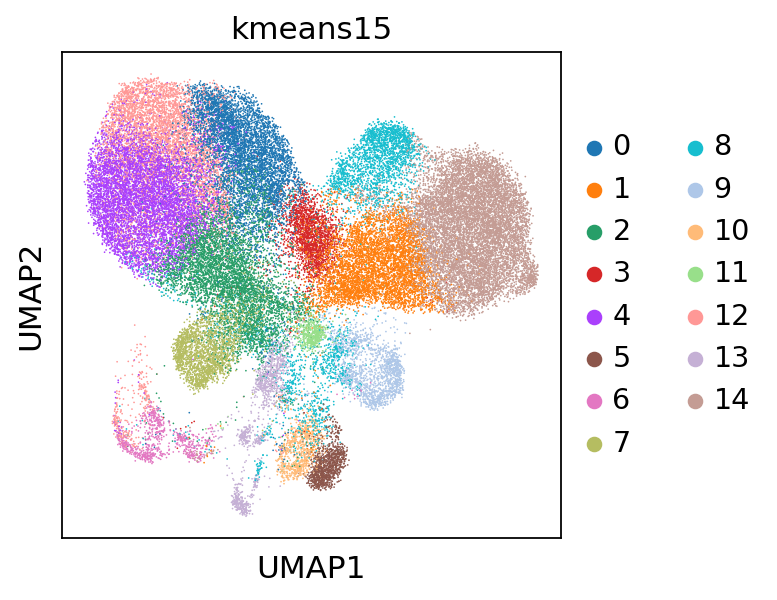

In [ ]:
adata.obs['kmeans15'] = labels[14]
sc.pl.umap(adata, color=['kmeans15'], save="_pca_kmeans_15_50.png")

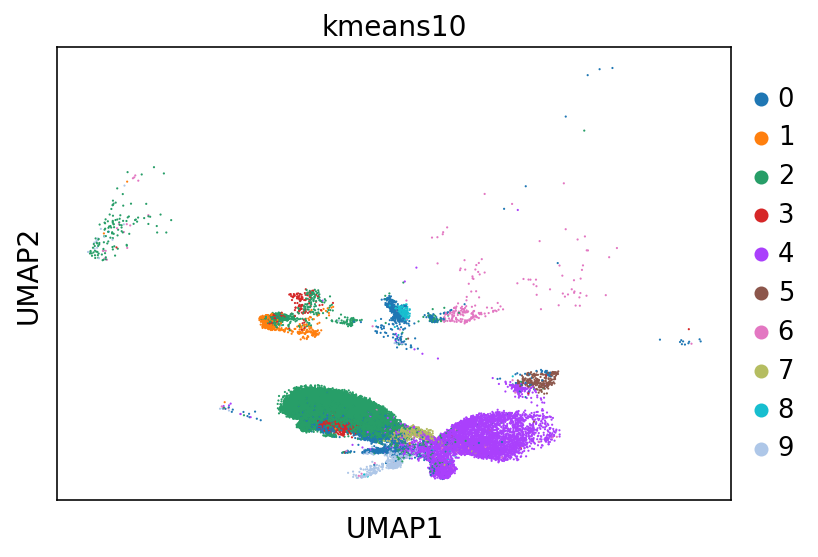

In [ ]:
# K-means
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=10, random_state=0).fit(adata.obsm['X_pca'])
# adata.obs['kmeans10'] = kmeans.labels_.astype(str)
# sc.pl.umap(adata, color=['kmeans10'])

Compute clustering metrics

In [ ]:
from sklearn.metrics import adjusted_rand_score


true_labels = ["Majority_voting_CellTypist", "Manually_curated_celltype"]
clustering = "louvain"
for label in true_labels:
  print("ARI", label, clustering, adjusted_rand_score(adata.obs[label], adata.obs[clustering]))

ARI Majority_voting_CellTypist louvain 0.44441945793572374
ARI Manually_curated_celltype louvain 0.6158516072433323


In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

for label in true_labels:
  print("AMI", label, clustering, adjusted_mutual_info_score(adata.obs[label], adata.obs[clustering]))

AMI Majority_voting_CellTypist louvain 0.4877198812386158
AMI Manually_curated_celltype louvain 0.6683542163710129


In [ ]:
from sklearn.metrics import normalized_mutual_info_score

for label in true_labels:
  print("NMI", label, clustering, normalized_mutual_info_score(adata.obs[label], adata.obs[clustering]))

NMI Majority_voting_CellTypist louvain 0.4878698438799787
NMI Manually_curated_celltype louvain 0.6684716978363218


Mixture of PPCA

In [29]:
adata.X

array([[-0.09563154, -0.12665045, -0.21807246, ..., -0.02376303,
        -0.66477964, -1.12220688],
       [-0.09563154, -0.12665045, -0.21807246, ...,  1.75406566,
         0.69887738, -1.12220688],
       [-0.09563154, -0.12665045, -0.21807246, ...,  0.54664674,
         0.09797386, -1.12220688],
       ...,
       [-0.18324198, -0.08415818, -0.30503886, ..., -0.48144163,
        -1.52715502, -0.37457089],
       [-0.18324198, -0.08415818, -0.30503886, ...,  0.13660641,
        -1.52715502, -0.37457089],
       [-0.18324198, -0.08415818, -0.30503886, ...,  0.27921161,
         0.29864582, -0.37457089]])

In [ ]:
# Going to replace X_pca with pca obtained by PPCA
# adata.X.shape
# adata
# Place original X_pca in .obsm["original_X_pca"]
# adata.obsm["original_X_pca"] = adata.obsm["X_pca"]
# adata

In [33]:
import json as json
import os as os

In [34]:
# Author: Meduri Venkata Shivaditya

import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logsumexp

"""
z = Wx + µ + E
the equation above represents the latent variable model which 
relates a d-dimensional data vector z to a corresponding q-dimensional 
latent variables x 
with q < d, for isotropic noise E ∼ N (0, σ2I)
z : latent
x : data
W : latent_to_observation matrix
µ : centres_of_clusters
E : var_of_latent
This code is an implementation of generative model of mixture of PPCA
Given the number of clusters, data_dim(D) and latent_dim(L)
we generate the data for every cluster n,  
we sample zn from a Gaussian prior and pass it through the
Wk matrix and add noise, where Wk maps from the L-dimensional subspace to the D-dimensional
visible space. Using the expectation maximization algorithm we estimate the parameters 
and then we plot the PC vectors
"""

# Data is your X
# n_clusters is the number of linear PCA models you wish to use
# latent_dim is the q q<d
# n_iterations is the number of iterations to do
def mixture_ppca_parameter_initialization(data, n_clusters, latent_dim, n_iterations):
    """
    The k-means algorithm is used to determine the centres. The
        priors are computed from the proportion of examples belonging to each
        cluster. The covariance matrices are calculated as the sample
        covariance of the points associated with (i.e. closest to) the
        corresponding centres. For a mixture of PPCA model, the PPCA
        decomposition is calculated for the points closest to a given centre.
        This initialisation can be used as the starting point for training
        the model using the EM algorithm.
        W : latent_to_observation matrix
    µ/mu : centres_of_clusters
    pi : proportion of data in each cluster
    sigma2 : variance of latent
    covars : covariance of the points associated with (i.e. closest to) the
        corresponding centres
    """
    n_datapts, data_dim = data.shape
    
    # initialization of the centres of clusters
    # E.g., if there are 5 examples and n_clusters = 2, it will get 2 random
    # integers ranging from 0 to 4, since 5 is one above the largest (signed integer)
    init_centers = np.random.randint(0, n_datapts, n_clusters)
    # Randomly choose distinct initial centres for the clusters
    # If any of the integers are the same, keep randomly choosing new integers
    # This is so that each mu is different
    while len(np.unique(init_centers)) != n_clusters:
        init_centers = np.random.randint(0, n_datapts, n_clusters)
    
    # mu is intialized to the rows selected by init_centers
    mu = data[init_centers, :]
    # Make an array that is nxn_clusters
    # E.g., if data is 5xd and n_clusters=2, distance_square is 5x2
    # Will contain the distance from each datapoint to each cluster
    # distances_square[:,0] contains the distance of each point to cluster 1
    distance_square = np.zeros((n_datapts, n_clusters))
    # clusters would be 5
    # Willl contain the assignment of each cluster to each datapoint
    clusters = np.zeros(n_datapts, dtype=np.int32)
    
    # Running iterations for K means algorithm to assign centres for clusters
    for k in range(n_iterations):
        # assign clusters
        for c in range(n_clusters):
            # .sum(1) means sum over
            # I think .sum(1) is sum over axis 1 which is the columns
            distance_square[:, c] = np.power(data - mu[c, :], 2).sum(1)
        clusters = np.argmin(distance_square, axis=1)
        # compute distortion
        # Get the minimum distance of each datapoint to its cluster
        distmin = distance_square[range(n_datapts), clusters]
        # compute new centers
        for c in range(n_clusters):
            # I think .mean(0) is mean over axis 0 which are the rows
            mu[c, :] = data[clusters == c, :].mean(0)
    
    # parameter initialization
    pi = np.zeros(n_clusters)  # Sum should be equal to 1
    W = np.zeros((n_clusters, data_dim, latent_dim))
    sigma2 = np.zeros(n_clusters)
    
    # epsilon = 0.001
    for c in range(n_clusters):
        # Each W is intially just random numbers
        W[c, :, :] = np.random.randn(data_dim, latent_dim)
        # Prior for pi is the proportion of datapoints in each cluster
        pi[c] = (clusters == c).sum() / n_datapts
        # sigma2 is sum of squared distances for each cluster divided by total distance for that cluster
        # divided by the data dimension
        # sigma2[c] = epsilon + (distmin[clusters == c]).mean() / data_dim
        sigma2[c] = (distmin[clusters == c]).mean() / data_dim
        
        # In case sigma2[c] = 0
        # if sigma2[c] == 0:
          # print("Assigning cluster", c, "sigma2", epsilon)
          # sigma2[c] = epsilon

    # If the data had more than two features, would this not be invalid
    covars = np.zeros(n_clusters)
    for i in range(n_clusters):
        # Picking all the rows in data where the assigned cluster is i then getting the first column
        # Picking all the rows in data where the assigned cluster is i then getting the second column
        covars[i] = (np.var(data[clusters == i, 0]) + np.var(data[clusters == i, 1])) / 2
    # print("Latent dimension: ", latent_dim)
    # print("mu.shape: ", mu.shape)
    # print("W.shape:", W.shape)
    # print("sigma2.shape: ", sigma2.shape)
    # print("covars.shape: ", covars.shape)
    return pi, mu, W, sigma2, covars, clusters


def mixture_ppca_expectation_maximization(data, pi, mu, W, sigma2, niter):
    """
    we can find the p(latent|data) with the assumption that data is gaussian
    z : latent
    x : data
    W : latent_to_observation matrix
    µ/mu : centres_of_clusters
    d : data_dimension
    q : latent_dimention
    σ2/ sigma2 : variance of latent
    π/pi : cluster proportion
    p(z|x) = (2πσ2)^−d/2 * exp(−1/(2σ2) * ||z − Wx − µ||)
    p(z) = ∫p(z|x)p(x)dx
    Solving for p(z) and then using the result we can find the p(x|z)
    through which we can find
    the log likelihood function which is
    log_likelihood = −N/2 * (d ln(2π) + ln |Σ| + tr(Σ−1S))
    We can develop an iterative EM algorithm for
    optimisation of all of the model parameters µ,W and σ2
    If Rn,i = p(zn, i) is the posterior responsibility of
    mixture i for generating data point zn,given by
    Rn,i = (p(zn|i) * πi) / p(zn)
    Using EM, the parameter estimates are as follows:
    µi = Σ (Rn,i * zn) / Σ Rn,i
    Si = 1/(πi*N) * ΣRn,i*(zn − µi)*(zn − µi)'
    Using Si we can estimate W and σ2
    For more information on EM algorithm for mixture of PPCA
    visit Mixtures of Probabilistic Principal Component Analysers
    by Michael E. Tipping and Christopher M. Bishop:
    page 5-10 of http://www.miketipping.com/papers/met-mppca.pdf
    """
    n_datapts, data_dim = data.shape
    n_clusters = len(sigma2)
    _, latent_dim = W[0].shape
    # n_clusters x q x q
    M = np.zeros((n_clusters, latent_dim, latent_dim))
    # n_clusters x q x q
    Minv = np.zeros((n_clusters, latent_dim, latent_dim))
    # n_clusters x d x d
    Cinv = np.zeros((n_clusters, data_dim, data_dim))
    # For each data point, one logR for each cluster
    logR = np.zeros((n_datapts, n_clusters))
    # For each data point, one R for each cluster
    R = np.zeros((n_datapts, n_clusters))
    M[:] = 0.0
    Minv[:] = 0.0
    Cinv[:] = 0.0
    # One log likelihood for each iteration
    log_likelihood = np.zeros(niter)

    epsilon = 0.001
    for i in range(niter):
        print(".", end="")
        for c in range(n_clusters):
            # M
            """
            M = σ2I + WT.W
            """
            # np.eye creates an identity matrix q x q
            M[c, :, :] = sigma2[c] * np.eye(latent_dim) + np.dot(W[c, :, :].T, W[c, :, :])
            # In case, M is not invertible
            # M[c, :, :] = M[c, :, :] + epsilon * np.eye(latent_dim)
            
            # Get the inverse of M
            Minv[c, :, :] = np.linalg.inv(M[c, :, :])
            # Cinv
            # d x d matrix
            Cinv[c, :, :] = (np.eye(data_dim) - np.dot(np.dot(W[c, :, :], Minv[c, :, :]), W[c, :, :].T)) / sigma2[c]

            # R_ni
            # Get how far each data is from mu
            deviation_from_center = data - mu[c, :]
            logR[:, c] = (
                np.log(pi[c])
                + 0.5
                * np.log(np.linalg.det(np.eye(data_dim) - np.dot(np.dot(W[c, :, :], Minv[c, :, :]), W[c, :, :].T)))
                - 0.5 * data_dim * np.log(sigma2[c])
                - 0.5 * (deviation_from_center * np.dot(deviation_from_center, Cinv[c, :, :].T)).sum(1)
            )
        
        """
        Using the log-sum-trick,  visit Section 2.5.4 in "Probabilistic Machine Learning: An Introduction" by Kevin P. Murphy for more information
        logsumexp(logR - myMax, axis=1) can be replaced by logsumexp(logR, axis=1)
        myMax + logsumexp((logR - myMax), axis=0) can be replaced by logsumexp(logR, axis=0)
        myMax in the above equations refer to
        myMax = logR.max(axis=0) & myMax = logR.max(axis=1).reshape((n_datapts, 1))
        """
        log_likelihood[i] = (logsumexp(logR, axis=1)).sum(axis=0) - n_datapts * data_dim * np.log(2 * math.pi) / 2.0

        logR = logR - np.reshape(logsumexp(logR, axis=1), (n_datapts, 1))

        logpi = logsumexp(logR, axis=0) - np.log(n_datapts)
        logpi = logpi.T
        pi = np.exp(logpi)
        R = np.exp(logR)
        for c in range(n_clusters):
            mu[c, :] = (R[:, c].reshape((n_datapts, 1)) * data).sum(axis=0) / R[:, c].sum()
            deviation_from_center = data - mu[c, :].reshape((1, data_dim))
            """
            Si = 1/(πi*N) * ΣRn,i*(zn − µi)*(zn − µi)'
            Si is used to estimate 
            """
            Si = (1 / (pi[c] * n_datapts)) * np.dot(
                (R[:, c].reshape((n_datapts, 1)) * deviation_from_center).T, np.dot(deviation_from_center, W[c, :, :])
            )

            Wnew = np.dot(
                Si, np.linalg.inv(sigma2[c] * np.eye(latent_dim) + np.dot(np.dot(Minv[c, :, :], W[c, :, :].T), Si))
            )

            sigma2[c] = (1 / data_dim) * (
                (R[:, c].reshape(n_datapts, 1) * np.power(deviation_from_center, 2)).sum() / (n_datapts * pi[c])
                - np.trace(np.dot(np.dot(Si, Minv[c, :, :]), Wnew.T))
            )

            W[c, :, :] = Wnew

    print("pi.shape: ", pi.shape)
    print("mu.shape: ", mu.shape)
    print("W.shape: ", W.shape)
    print("sigma2.shape :", sigma2.shape)
    print("log_likelihood.shape: ", log_likelihood.shape)
    return pi, mu, W, sigma2, log_likelihood, R


def generate_data():
    n = 500
    r = np.random.rand(1, n) + 1
    theta = np.random.rand(1, n) * (2 * math.pi)
    x1 = r * np.sin(theta)
    x2 = r * np.cos(theta)
    X = np.vstack((x1, x2))
    return np.transpose(X)


def mixppcademo(data, n_clusters):
    """
    W : latent to observation matrix
    mu : centres_of_clusters
    pi : proportions of data in each of the cluster
    sigma2 : variance of latent
    L : log likelihood after each iteration
    covars : covariance of the points associated with (i.e. closest to) the
        corresponding centres
    """
    plt.plot(data[:, 0], data[:, 1], "o", c="blue", mfc="none")
    pi, mu, W, sigma2, covars, clusters = mixture_ppca_parameter_initialization(
        data, n_clusters, latent_dim=1, n_iterations=10
    )
    pi, mu, W, sigma2, L, R = mixture_ppca_expectation_maximization(data, pi, mu, W, sigma2, 10)

    for i in range(n_clusters):
        v = W[i, :, :]
        # Plotting the pc vectors using 2 standard deviations
        start = mu[i].reshape((2, 1)) - (v * 2 * np.sqrt(sigma2[i]))
        endpt = mu[i].reshape((2, 1)) + (v * 2 * np.sqrt(sigma2[i]))
        linex = [start[0], endpt[0]]
        liney = [start[1], endpt[1]]
        plt.plot(linex, liney, linewidth=3, c="black")
        theta = np.arange(0, 2 * math.pi, 0.02)
        # Plotting the confidence interval ellipse using 2 standard deviations
        x = 2 * np.sqrt(sigma2[i]) * np.cos(theta)
        y = np.sqrt(covars[i]) * np.sin(theta)
        rot_matrix = np.vstack((np.hstack((v[0], -v[1])), np.hstack((v[1], v[0]))))
        ellipse = np.dot(rot_matrix, np.vstack((x, y)))
        ellipse = np.transpose(ellipse)
        ellipse = ellipse + np.dot(np.ones((len(theta), 1)), mu[i, :].reshape((1, 2)))
        plt.plot(ellipse[:, 0], ellipse[:, 1], c="crimson")
    return R, mu

# def main():
# np.random.seed(61)
# data = generate_data()
# plt.figure(0)
# R_1, mu_1 = mixppcademo(data, n_clusters=1)
# plt.savefig("mixppca_k-1.png", dpi=300)
# np.random.seed(7)
# data = generate_data()
# plt.figure(1)
# R_10, mu_10 = mixppcademo(data, n_clusters=10)
# plt.savefig("mixppca_k-10.png", dpi=300)
# plt.show()


# if __name__ == "__main__":
    # main()

In [30]:
use_highly_variable = True
adata_comp = (
    adata[:, adata.var['highly_variable']] if use_highly_variable else adata
)

In [31]:
present_genes = []
absent_genes = []
for gene in myeloid_genes:
  if gene in adata_comp.var["highly_variable"]:
    present_genes.append(gene)
  else:
    absent_genes.append(gene)
for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    if gene in adata_comp.var["highly_variable"]:
      present_genes.append(gene)
    else:
      absent_genes.append(gene)
print("Number of genes present:", len(present_genes))
print("Number of genes absent:", len(absent_genes))
print("Genes absent:", absent_genes)

Number of genes present: 36
Number of genes absent: 6
Genes absent: ['CD74', 'HLA-DRA', 'CD14', 'C1QA', 'AIRE', 'CRLF2']


In [ ]:
n_clusters = 4
latent_dim = 10
n_iterations = 15
em_iterations = 5
pi, mu, W, sigma2, covars, clusters = mixture_ppca_parameter_initialization(adata_comp.X,
                                                                            n_clusters=n_clusters,
                                                                            latent_dim=latent_dim,
                                                                            n_iterations=n_iterations)
print(sigma2)
print(covars)
pi, mu, W, sigma2, L, R = mixture_ppca_expectation_maximization(adata_comp.X, pi, mu, W, sigma2, em_iterations)
print(pi)
print(L)

Assigning cluster 0 sigma2 0.001
[0.001      0.96994136 0.58814384 0.93545082]
[0.         1.06260014 0.15847591 1.48954868]
..

LinAlgError: ignored

In [ ]:
preprocessing = "scaled"
regressed = True
if use_highly_variable:
  print("Using highly variable")
  preprocessing = "highly variable genes and " + preprocessing 
if regressed:
  print("Regressed out chemistry")
  preprocessing = preprocessing + " regressed out chemistry"

mixture_pca = {"dataset": "myeloid",
               "n_clusters": n_clusters,
               "latent_dim": latent_dim,
               "initialization_n_iterations": n_iterations,
               "expectation_maximization_iterations": em_iterations,
               "mu": mu.tolist(),
               "W": W.tolist(),
               "sigma2": sigma2.tolist(),
               "L": L.tolist(),
               "R": R.tolist(),
               "adata_comp": use_highly_variable,
               "adata_comp.shape": adata_comp.shape,
               "preprocessing": preprocessing,
               "present_genes": present_genes,
               "absent_genes": absent_genes}

save_json = True
dir_path = "drive/MyDrive/immune_cell_dataset/mixture_files/"
specific_mixture = str(n_clusters) + "_" + str(latent_dim)
if use_highly_variable:
  specific_mixture = specific_mixture + "_variable"
if regressed:
  specific_mixture = specific_mixture + "_regressed"
if save_json:
  print("Saving mixture PPCA json file")
  with open("mixture_ppca_"+specific_mixture+".json", "w") as json_file:
    json.dump(mixture_pca, json_file)
    json_file.close()

Using highly variable
Regressed out chemistry
Saving mixture PPCA json file


In [35]:
# Might delete this cell if already saving information in a JSON file on Google Drive

# desired_clusters = 3
# desired_latent_dim = 50
dir_path = "drive/MyDrive/immune_cell_dataset/mixture_files_regressed/"
# mixture_ppca_name = "mixture_ppca_" + str(desired_clusters) + "_" + str(desired_latent_dim) + ".json"

mixture_ppca_name = "mixture_ppca_3_50_variable_regressed.json"
f = open(os.path.join(dir_path, mixture_ppca_name))
mixture_data = json.load(f)
convert = ["mu", "W", "sigma2", "L", "R"]
for param in convert:
  mixture_data[param] = np.array(mixture_data[param])
# adata_comp.write("./adata_comp_immune.h5ad")

Evaulating PCs

In [36]:
def observation_to_latent(data, W, R):
  """
  Transform observed data to latent representation using cluster assignment and weights for that cluster.
  Assumes the data is already centered.
  """
  clusters = R.argmax(axis=1)
  
  n, _ = data.shape
  _, q = W[0,:,:].shape
  print(n)
  print(q)

  latent_data = np.zeros((n, q))
  for i in range(0, n):
    latent_data[i,:] = np.dot(W[clusters[i],:,:].T,data[i,:])
  return latent_data


# latent_data = observation_to_latent(adata_comp.X, W, clusters)
# print("Shape of the latent data:", latent_data.shape)
# print("Shape of mu:", mu.shape)
# print_clusters(latent_data, clusters, mu)
# print(latent_data)
# print(adata_comp.obsm['original_X_pca'])

Generating X_pca

In [37]:
use_mixture_data = True
if use_mixture_data:
  print("Using json file")
  print("n_clusters:", mixture_data["n_clusters"])
  print("latent_dim:", mixture_data["latent_dim"])
  latent_data = observation_to_latent(adata_comp.X, mixture_data["W"], mixture_data["R"])
else:
  print("n_clusters:", n_clusters)
  print("latent_dim:", latent_dim)
  latent_data = observation_to_latent(adata_comp.X, W, R)

Using json file
n_clusters: 3
latent_dim: 50
51552
50


In [38]:
adata_comp.obsm['X_pca'] = latent_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [39]:
latent_data.shape
adata_comp.X.shape
adata_comp.obsm['X_pca'].shape
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    layers: 'X_explained'

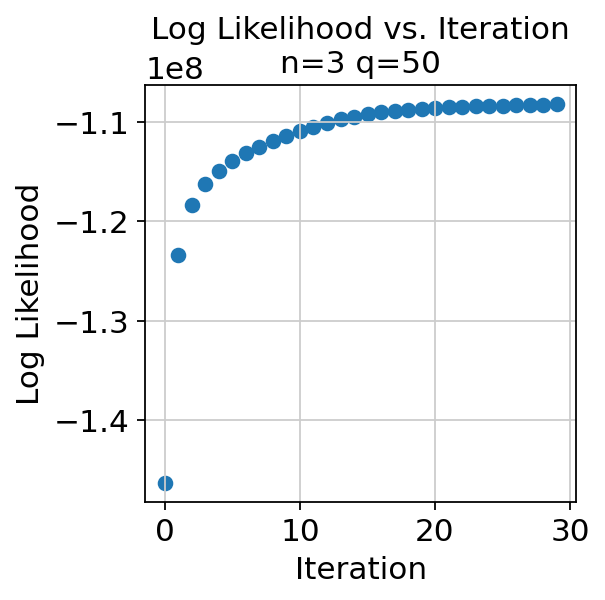

In [40]:
# Display the log likelihood
use_mixture_data = True
if use_mixture_data:
  plt.scatter([i for i in range(0, mixture_data["expectation_maximization_iterations"])], mixture_data["L"])
  plt.xlabel("Iteration")
  plt.ylabel("Log Likelihood")
  plt.title("Log Likelihood vs. Iteration\n" +
            "n=" + str(mixture_data["n_clusters"]) + " q=" + str(mixture_data["latent_dim"]))
  plt.tight_layout()
  plt.savefig("./figures/L_3_50_regressed.png")
  plt.show()
  plt.close()
else:
  plt.scatter([i for i in range(0, em_iterations)], L)
  plt.xlabel("Iteration")
  plt.ylabel("Log Likelihood")
  plt.title("Log Likelihood vs. Iteration\n" + "n=" + str(n_clusters) + " q=" + str(latent_dim))
  plt.show()
  plt.close()

In [ ]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    layers: 'X_explained'

Top Loadings

In [41]:
mixture_data['W'].shape

(3, 1816, 50)

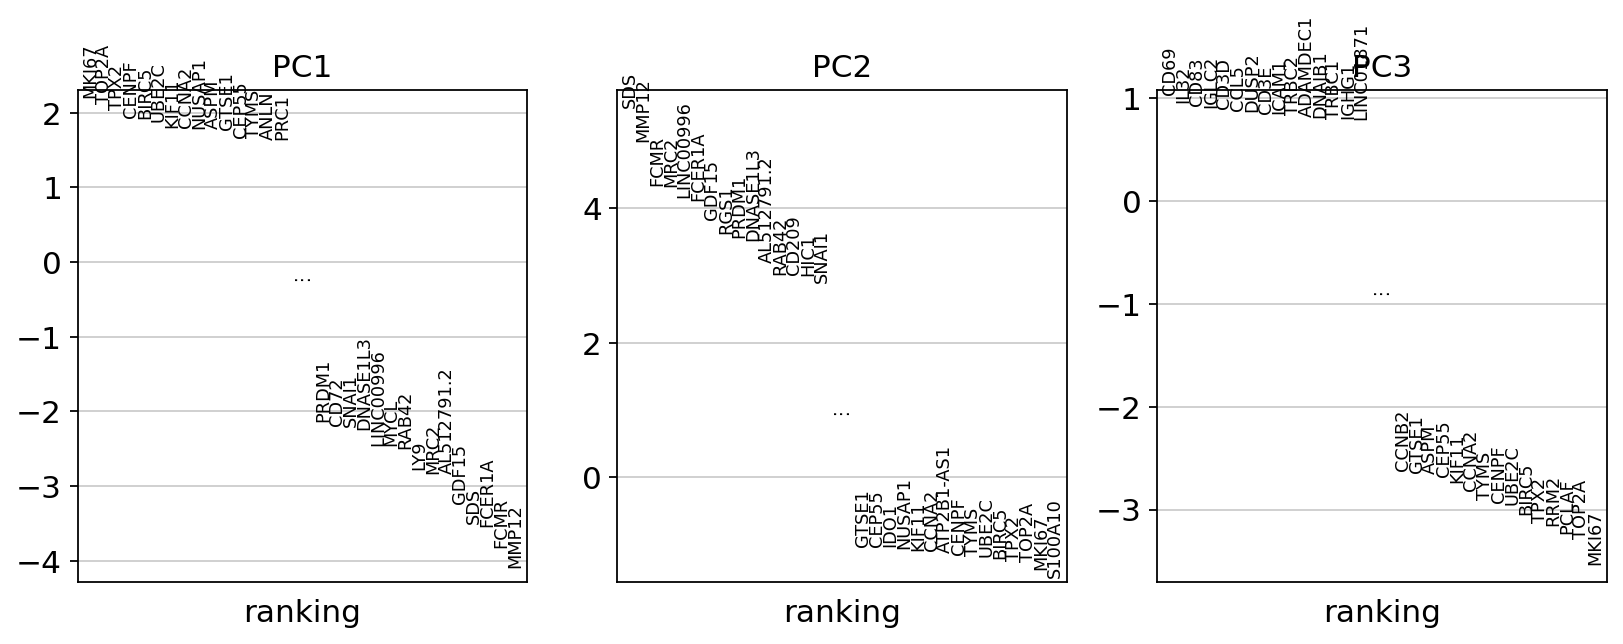

In [42]:
# Have to assign one of W first
adata_comp.varm["PCs"] = mixture_data['W'][0]
sc.pl.pca_loadings(adata_comp, components = '1,2,3')

Number of loadings: 10
use_absolute: True


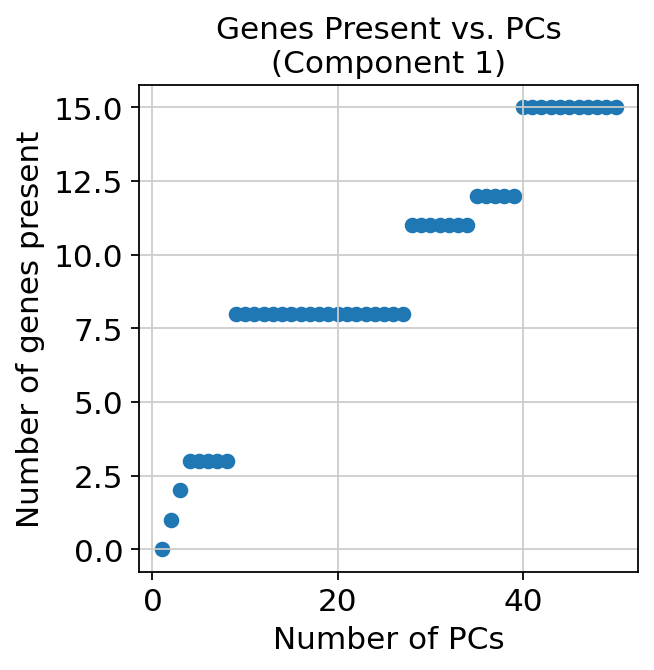

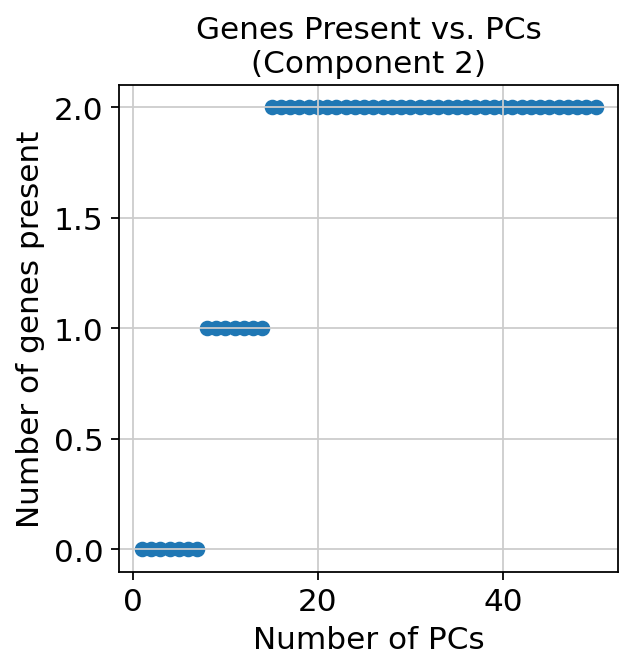

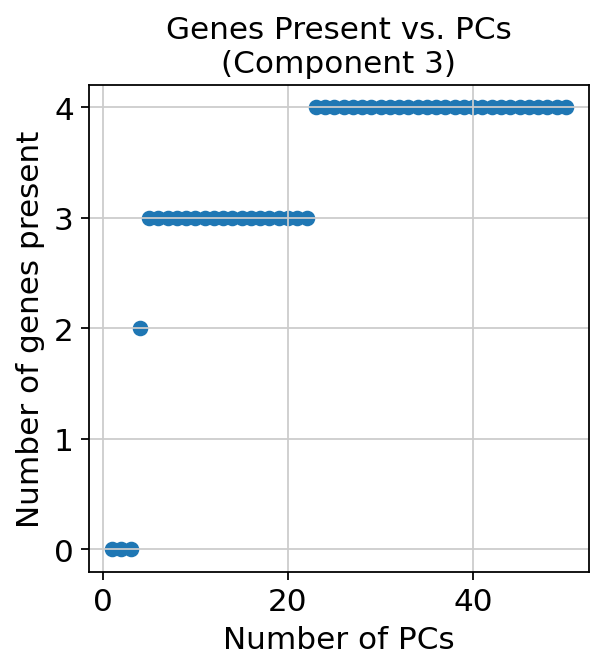

In [47]:
num_select = 10
use_absolute = True
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
# Go over each component
for k in range(0, mixture_data["n_clusters"]):
  
  plt.scatter([i for i in range(1, mixture_data["latent_dim"]+1)],
              [len(get_all_genes(adata_comp, mixture_data["W"][k], i, present_genes, num_select=num_select, use_absolute=use_absolute))
              for i in range(0, mixture_data["latent_dim"])])
  plt.xlabel("Number of PCs")
  plt.ylabel("Number of genes present")
  plt.title("Genes Present vs. PCs\n(Component " + str(k+1) + ")")
  plt.show()
  plt.close()

In [50]:
num_select = 10
use_absolute = True
num_pcs = 40
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
print("Number of principal components:", num_pcs)
print("\n")

overall_genes = []
# Go over each component
for k in range(0, mixture_data["n_clusters"]):
  
  print("Component:", k+1)
  selected_genes = get_all_genes(adata_comp,
                                 mixture_data["W"][k],
                                 num_pcs,
                                 present_genes,
                                 num_select=num_select,
                                 use_absolute=use_absolute)
  
  selected_types = []
  for gene in selected_genes:
    if gene in special_myeloid_genes:
      selected_types.append(special_myeloid_genes[gene])
    else:
      selected_types.append("-")
  
    if gene not in overall_genes:
      overall_genes.append(gene)
  
  print("Number of selected genes:", len(selected_genes))
  print("Selected genes:", selected_genes)
  print("Selected gene types:", selected_types)
  print("\n")  

Number of loadings: 10
use_absolute: True
Number of principal components: 40


Component: 1
Number of selected genes: 15
Selected genes: ['SDS', 'DNASE1L3', 'MKI67', 'SELENOP', 'CXCL12', 'CD209', 'IGF1', 'SLC40A1', 'CLEC9A', 'IDO1', 'PKIB', 'CD3E', 'FSCN1', 'LAMP3', 'CCR7']
Selected gene types: ['-', '-', '-', '-', '-', ('macrophage', 'gut'), ('macrophage', 'gut'), ('macrophage', 'erythrophagocytic'), ('dendritic', 'DC1'), '-', '-', '-', '-', ('dendritic', 'migDC'), ('dendritic', 'migDC')]


Component: 2
Number of selected genes: 2
Selected genes: ['BHLHE41', 'TREM2']
Selected gene types: ['-', ('macrophage', 'alveolar')]


Component: 3
Number of selected genes: 4
Selected genes: ['ZNF703', 'CDKN1C', 'FCGR3A', 'CLU']
Selected gene types: ['-', '-', ('monocyte', 'nonclassical'), '-']




In [ ]:
overall_absent = []
for gene in present_genes:
  if gene not in overall_genes:
    overall_absent.append(gene)

print("Number of total present genes in highly variable genes:", len(present_genes))
print("Number of total absent genes in highly variable genes:", len(absent_genes))
print("Number of genes present across all components:", len(overall_genes))
print("Number of genes absent across all components:", len(overall_absent))
print("Genes absent:", overall_absent)

Number of total present genes in highly variable genes: 36
Number of total absent genes in highly variable genes: 6
Number of genes present across all components: 21
Number of genes absent across all components: 15
Genes absent: ['XCR1', 'CLEC10A', 'CD1C', 'CRISPLD2', 'MARC1', 'CX3CR1', 'GPNMB', 'TNIP3', 'CCL2', 'SPP1', 'CD5L', 'SPIC', 'VCAM1', 'PDLIM4', 'EBI3']


Number of loadings: 10
use_absolute: True
Number of principal components: 50




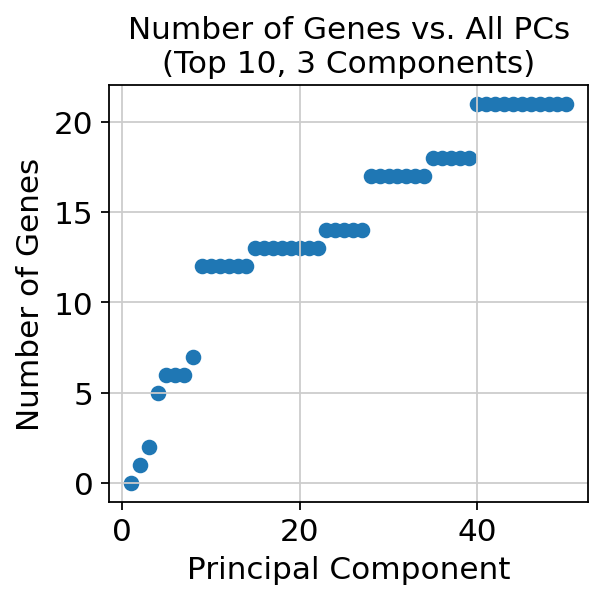

Number of genes with 40 components: 21
Number of genes with 50 components: 21


In [49]:
num_select = 10
use_absolute = True
num_pcs = 50
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
print("Number of principal components:", num_pcs)
print("\n")

pc_num_genes = {}
for i in range(0, num_pcs):
  pc_genes = []
  # Go over each component
  for j in range(0, mixture_data["n_clusters"]):
    selected_genes = get_all_genes(adata_comp,
                                  mixture_data["W"][j],
                                  i,
                                  present_genes,
                                  num_select=num_select,
                                  use_absolute=use_absolute)
    for gene in selected_genes:
      if gene not in pc_genes:
        pc_genes.append(gene)

  pc_num_genes[i+1] = len(pc_genes)

plt.scatter([i for i in range(1, num_pcs+1)], [pc_num_genes[i] for i in range(1, num_pcs+1)])
plt.title("Number of Genes vs. All PCs\n(Top "+ str(num_select) + ", 3 Components)")
plt.xlabel("Principal Component")
plt.ylabel("Number of Genes")
plt.tight_layout()
plt.savefig("3_50_mixture_genes.png")
plt.show()
plt.close()

print("Number of genes with 40 components:", pc_num_genes[40])
print("Number of genes with 50 components:", pc_num_genes[50])

Variance Ratio

In [ ]:
def compute_mixture_variance_ratio(Z, W, X, n_pcs, R, n_clusters):
  """
  Compute the variance ratio for a mixture of PPCA.
  Z is the transformed data in the latent dimension.
  W is the weights, one weight matrix for each cluster.
  n_pcs is the number of principal components to compute the variance ratio for from 1 to n_pcs.
  R is the responsibility of each cluster for each data point.
  n_clusters is the number of components used in the mixture of PPCA.
  The variance ratio is calculated as ||ZW-X||^_2F/||X||^2_F, where F means the Frobenius norm
  """
  
  clusters = R.argmax(axis=1)
  n, d = X.shape
  
  cluster_variance_ratios = {}
  # variance_ratios = np.zeros(n_clusters*n_pcs,)
  # Go over each cluster
  for i in range(0, n_clusters):
    # Get the X for that cluster
    Xi = X[clusters == i]
    Zi = Z[clusters == i]
    Wi = W[clusters[i]]
    # print(sum(clusters == i))
    # print(Zi.shape)
    # print(Wi.shape)
    cluster_variance_ratios[i] = compute_variance_ratio(Zi, Wi, Xi, n_pcs)
  return cluster_variance_ratios

In [ ]:
variance_ratios_10 = compute_mixture_variance_ratio(adata_comp.obsm['X_pca'],
                                                    mixture_data["W"],
                                                    adata_comp.X,
                                                    10,
                                                    mixture_data["R"],
                                                    3)
print(variance_ratios_10)

{0: array([  -5691.87266254,  -17487.99838004,  -12594.75043793,
        -74942.5259541 , -160305.61178748,  -44397.83159468,
        -28929.2170626 , -233105.11416806,   -4677.56880177,
        -23789.13081731]), 1: array([-1.16462063e+01, -1.40369908e+05, -6.19850671e+05, -2.93939760e+03,
       -5.29582099e+05, -3.44414811e+05, -9.74867816e+04, -9.31191465e+05,
       -6.02884710e+05, -9.59767253e+04]), 2: array([-6.06608738e+01, -8.00063677e+03, -4.29590060e+04,  1.54082106e+03,
        1.75343406e+04, -8.21356715e+04,  1.66972726e+02,  9.91967209e+02,
        6.43411479e+03,  4.97692416e+03])}


In [ ]:
adata_comp.uns['pca'] = {'params': {'zero_center': True, 'use_highly_variable': True},
                        'variance': None,
                        'variance_ratio': variance_ratios_10[0]}
variance_ratios_10

{0: array([  -5691.87266254,  -17487.99838004,  -12594.75043793,
         -74942.5259541 , -160305.61178748,  -44397.83159468,
         -28929.2170626 , -233105.11416806,   -4677.56880177,
         -23789.13081731]),
 1: array([-1.16462063e+01, -1.40369908e+05, -6.19850671e+05, -2.93939760e+03,
        -5.29582099e+05, -3.44414811e+05, -9.74867816e+04, -9.31191465e+05,
        -6.02884710e+05, -9.59767253e+04]),
 2: array([-6.06608738e+01, -8.00063677e+03, -4.29590060e+04,  1.54082106e+03,
         1.75343406e+04, -8.21356715e+04,  1.66972726e+02,  9.91967209e+02,
         6.43411479e+03,  4.97692416e+03])}

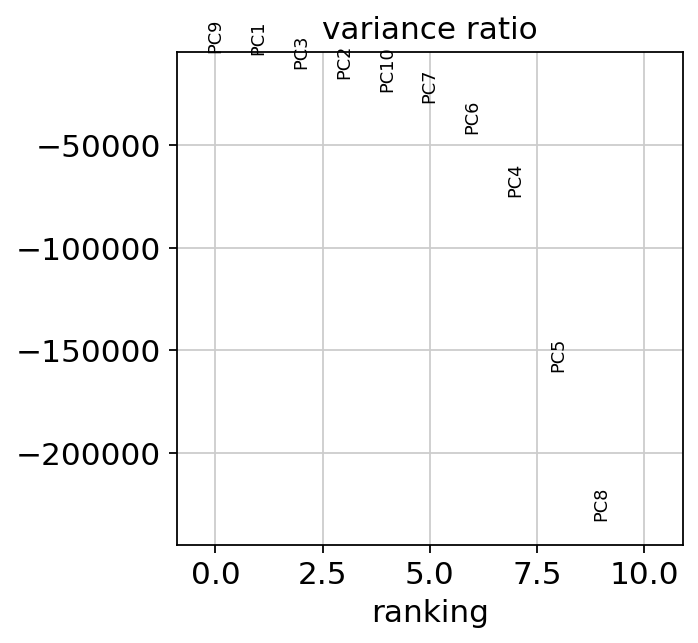

In [ ]:
sc.pl.pca_variance_ratio(adata_comp, n_pcs=10, log=False)

Performing Clustering

Computing the neighborhood graph

In [ ]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.3 MB/s 
     |████████████████████████████████| 3.3 MB 53.3 MB/s 


In [ ]:
!pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [ ]:
sc.pp.neighbors(adata_comp, n_neighbors=30, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [ ]:
adata_comp.obsm["X_pca"]

array([[  62.79158981,  -21.13861747, -271.09641295, ...,  523.36176684,
         245.43424876,  426.16049536],
       [ -21.99004618,  -12.50025995,   20.73178828, ...,   45.15613982,
         -70.28046694,  -41.83749833],
       [ -22.99884957,  -65.34450872,   89.77402232, ...,   86.55399241,
         -77.86335939,  -51.01546261],
       ...,
       [  28.26633188, -106.22320905,  -58.92808202, ...,  225.18577075,
        -173.4313819 ,  311.42987787],
       [  28.69253228,  -50.69077646, -317.19742424, ...,  -81.54948618,
         -56.53469741, -256.51229289],
       [   6.29899463,  -20.4247689 , -193.39701762, ...,  -38.28196274,
          -5.88997159, -121.14216181]])

In [ ]:
# Alternative to sc.pp.neighbors
# Defaults are 3 neighbors within batch and 50 pcs
bbknn.bbknn(adata_comp, batch_key="Donor", neighbors_within_batch=5, n_pcs=40)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:21)


Clustering the neighborhood graph

In [ ]:
sc.tl.leiden(adata_comp, resolution=0.2)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:28)


In [ ]:
sc.tl.louvain(adata_comp, resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:45)


Embedding the neighborhood graph

In [ ]:
sc.tl.umap(adata_comp)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:31)


Visualizing the clusters

In [ ]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'leiden', 'louvain'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'neighbors', 'leiden', 'louvain', 'umap', 'Chemistry_colors'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'
    obsp: 'distances', 'connectivities'

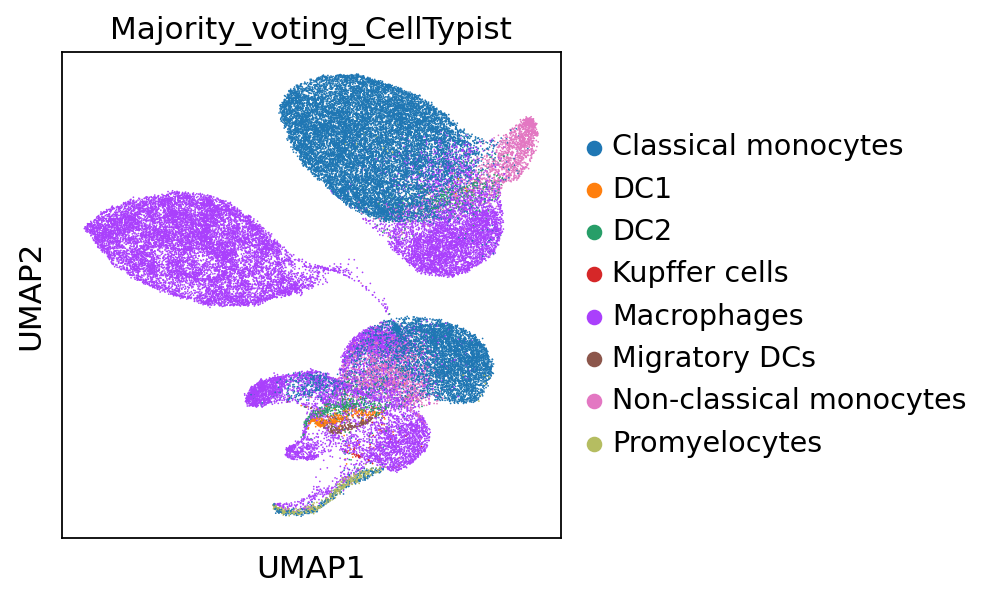

In [ ]:
sc.pl.umap(adata_comp, color='Majority_voting_CellTypist', use_raw=False, save="_3_50_regressed_bbknn_5_40_majority.png")

K-means Clustering

In [ ]:
# K-means
from sklearn.cluster import KMeans

max_clusters = 30
num_PCs = 40
distortions = np.zeros(max_clusters)
labels = []
for i in range(1, max_clusters+1):
  X_pca = adata_comp.obsm["X_pca"][:, 0:num_PCs]
  print(X_pca.shape)
  kmeans = KMeans(n_clusters=i, random_state=0, n_init=20, max_iter=500, tol=1e-04).fit(X_pca)
  
  distortions[i-1] = kmeans.inertia_
  labels.append(kmeans.labels_.astype(str))

(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)
(51552, 40)


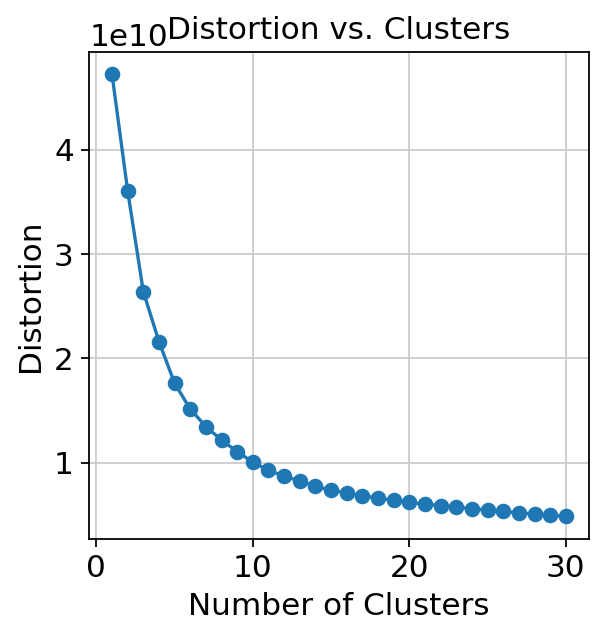

In [ ]:
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Distortion vs. Clusters")
plt.savefig("./figures/kmeans_elbow_plot_mixture_regressed_3_50_30_40.png")
# plt.show()
# plt.close()

In [ ]:
adata_comp.obs['kmeans8'] = labels[7]
adata_comp.obs['kmeans11'] = labels[10]
# Below pick the label that provides the kink, k-1
adata_comp.obs['kmeans10'] = labels[9]

In [ ]:
adata_comp.obsm['X_umap'] = adata_comp.obsm['original_X_umap']

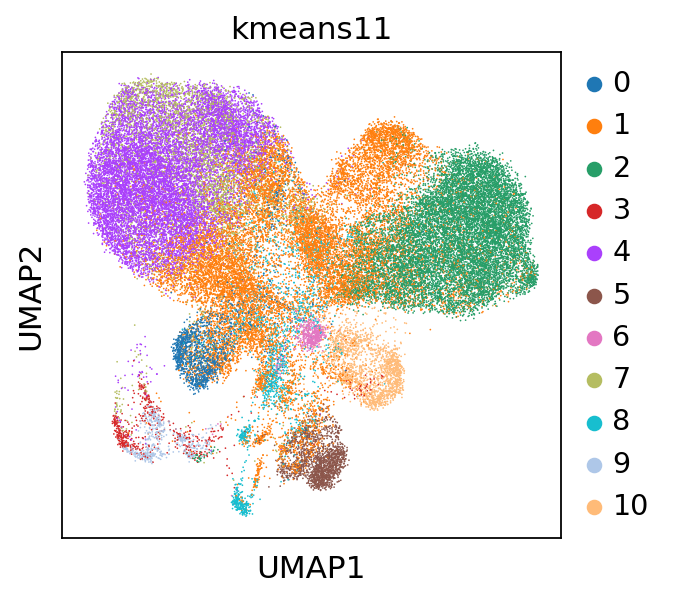

In [ ]:
sc.pl.umap(adata_comp, color=['kmeans11'], save="_mixture_regressed_3_50_kmeans_11_40.png")

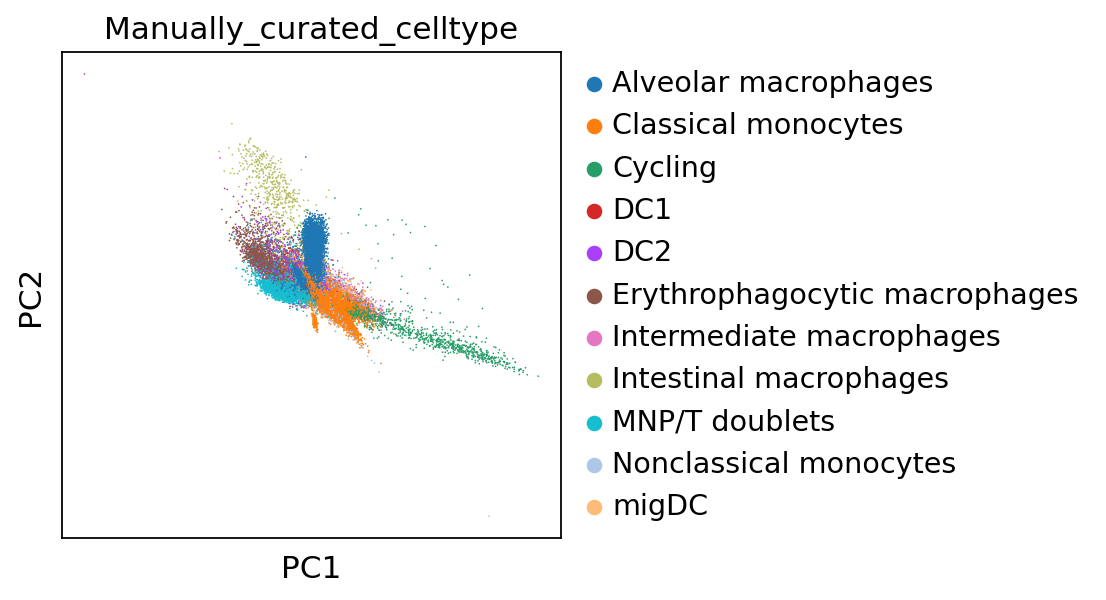

In [ ]:
sc.pl.pca(adata_comp, color=['Manually_curated_celltype'], save="_mixture_regressed_3_50_manually.png")

Soft Clustering from PPCA

In [ ]:
adata_comp.obsm['X_umap'] = adata_comp.obsm['original_X_umap']

In [ ]:
mixture_clusters = mixture_data["R"].argmax(axis=1).astype(str)

In [ ]:
adata_comp.obs["mixture_clusters"] = mixture_clusters

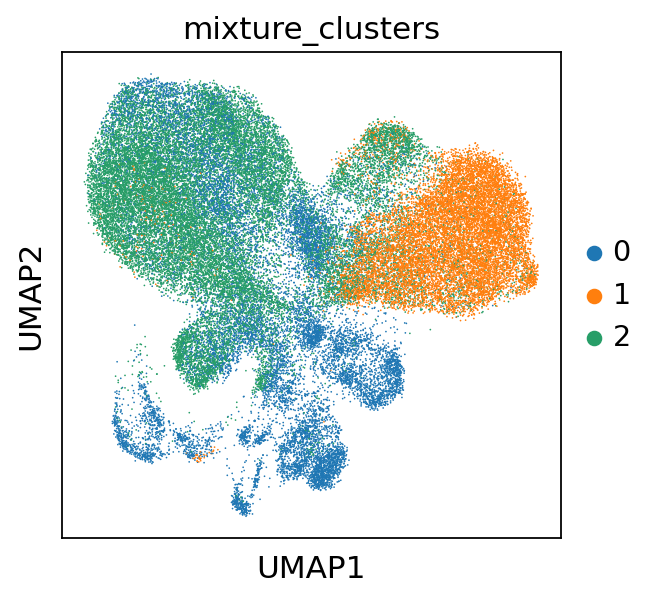

In [ ]:
sc.pl.umap(adata_comp, color=['mixture_clusters'], save="_mixture_regressed_3_50_mixture_clusters.png")

Compute clustering metrics

Compute ARI

In [ ]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'kmeans8', 'kmeans11', 'kmeans10'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'kmeans8_colors', 'kmeans11_colors', 'kmeans10_colors', 'Majority_voting_CellTypist_colors'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    layers: 'X_explained'

In [ ]:
from sklearn.metrics import adjusted_rand_score


true_labels = ["Majority_voting_CellTypist", "Manually_curated_celltype"]
clustering = "louvain"
for label in true_labels:
  print("ARI", label, clustering, adjusted_rand_score(adata_comp.obs[label], adata_comp.obs[clustering]))

ARI Majority_voting_CellTypist louvain 0.23562169860900845
ARI Manually_curated_celltype louvain 0.3618123150962259


In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

for label in true_labels:
  print("AMI", label, clustering, adjusted_mutual_info_score(adata_comp.obs[label], adata_comp.obs[clustering]))

AMI Majority_voting_CellTypist louvain 0.37430442232567473
AMI Manually_curated_celltype louvain 0.5456865820036206


In [ ]:
from sklearn.metrics import normalized_mutual_info_score

for label in true_labels:
  print("NMI", label, clustering, normalized_mutual_info_score(adata_comp.obs[label], adata_comp.obs[clustering]))

NMI Majority_voting_CellTypist louvain 0.37458693176762214
NMI Manually_curated_celltype louvain 0.5459397466672683


Extra below

In [ ]:
# adata_1 = sc.read_h5ad("./drive/MyDrive/immune_cell_dataset/CountAdded_PIP_global_object_for_cellxgene.h5ad")
# adata_1

In [ ]:
# adata_1.X[1,:][adata_1.X[1,:].nonzero()]

In [ ]:
# adata.X[1,:][adata.X[1,:].nonzero()]

In [ ]:
# adata_2 = sc.read_h5ad("./drive/MyDrive/immune_cell_dataset/global.h5ad")
# adata_2

In [ ]:
# adata_2.X[0,:]

In [ ]:
!cp -r figures ./drive/MyDrive

In [ ]:
def show_pca(adata_object, color, n_components=None):
  """
  Shows a graph of the PCA with the desired color.
  If n_components is not None then it will reassign X_pca and PCs to be the appropriate one.
  Warning, this will overwrite the current PCA and PCs. The PCA and PCs must also exist for n_components.
  """
  if n_components:
    print("Using n_components:", n_components)
    adata_object.obsm["X_pca"] = adata_object.obsm[str(n_components)+"_X_pca"]
    adata_object.varm["PCs"] = adata_object.varm[str(n_components)+"_PCs"]
  sc.pl.pca(adata_object, color=color)

show_pca(adata, 'Organ', 2)
show_pca(adata, 'Manuall_curated_Celltype', 100)

Using n_components: 2


KeyError: ignored

In [ ]:
def get_top_pca_loadings(adata_object, W, component, num_select=15):
  """
  adata_object: The adata object.
  W: The weights.
  component: The index of the principal component to look at. E.g., fror the first principal component,
    component should be 0.
  num_select: Number of top and bottom to choose. E.g., 15 will get 30 values back in total.
    The top 15 and the bottom 15.
  An alternative way to get the top loadings as opposed to visualizing it on the graph.
  """
  # Get the indices of the array if it were to be sorted
  # sorted_indices = np.argsort(W[:,component])
  # top = sorted_indices[-1:-num_select-1:-1]
  # bottom = sorted_indices[0:num_select]
  # print(W[:,component][top])
  # print(W[:,component][bottom])
  # top_loadings = adata_object.var["highly_variable"].iloc[top]
  # bottom_loadings = adata_object.var["highly_variable"].iloc[bottom]
  
  absolute_component = np.absolute(W[:,component])
  sorted_indices = np.argsort(absolute_component)
  top = sorted_indices[-1:-num_select-1:-1]
  top_loadings = adata_object.var["highly_variable"].iloc[top]
  
  return top_loadings
  # return top_loadings, bottom_loadings 

36
28
['GPNMB', 'CD3E', 'MKI67', 'SELENOP', 'CXCL12', 'SLC40A1', 'CCL2', 'IDO1', 'CD5L', 'CLU', 'VCAM1', 'SPIC', 'ZNF703', 'CDKN1C', 'FCGR3A', 'DNASE1L3', 'CD209', 'CLEC10A', 'IGF1', 'FSCN1', 'CCR7', 'SDS', 'LAMP3', 'CLEC9A', 'CD1C', 'PKIB', 'SPP1', 'TREM2']
XCR1 dendritic
CRISPLD2
MARC1
CX3CR1 monocyte
BHLHE41
TNIP3 macrophage
PDLIM4 dendritic
EBI3 dendritic
Saving figure


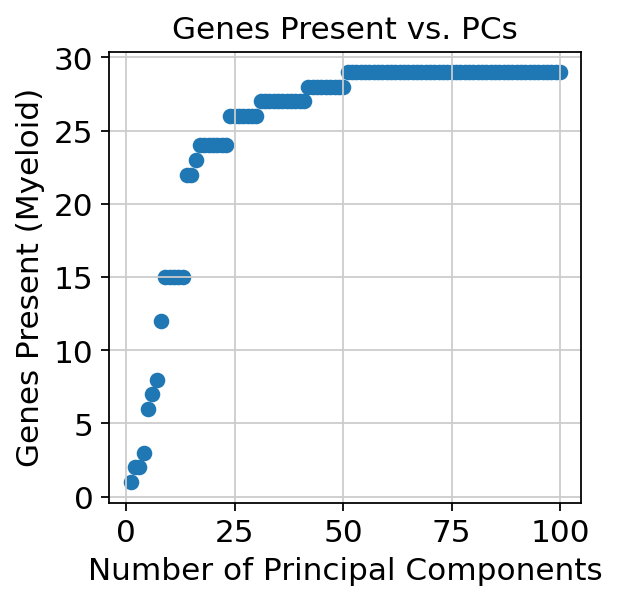

In [ ]:
def get_all_genes(adata_object, W, num_pcs, present_genes):
  """
  adata_object: The adata object.
  W: The weights.
  num_pcs: The number of principal components to look for.
  present_genes: The genes to check the presence of.

  Gets the top genes and bottom genes for each principal component then gets the ones
  that are present in present_genes and returns them. Does this for num_pcs.
  """
  
  pc_present = []
  for i in range(0, num_pcs):
    # Get top genes and bottom genes of each principal component
    # top, bottom = get_top_pca_loadings(adata_object, W, i)
    top = get_top_pca_loadings(adata_object, W, i)
    # print(top.index)
    # print(bottom.index)
    
    # Add in the top genes
    for gene in top.index:
      if gene in present_genes and gene not in pc_present:
        pc_present.append(gene)
    # Add in the bottom genes
    # for gene in bottom.index:
      # if gene in present_genes and gene not in pc_present:
        # pc_present.append(gene)
  return pc_present

first_present = get_all_genes(adata, adata.varm["PCs"], 50, present_genes)
print(len(present_genes))
print(len(first_present))
print(first_present)
for gene in present_genes:
  if gene not in first_present:
    if gene in special_myeloid_genes:
      print(gene, special_myeloid_genes[gene])
    else:
      print(gene)

max_pcs = 100
plt.scatter([i for i in range(1, max_pcs+1)], [len(get_all_genes(adata, adata.varm['PCs'], i, present_genes)) for i in range(1, max_pcs+1)])
plt.title("Genes Present vs. PCs")
plt.xlabel("Number of Principal Components")
plt.ylabel("Genes Present (Myeloid)")
# plt.show()
save_pca_top = True
if save_pca_top:
  print("Saving figure")
  plt.tight_layout()
  plt.savefig("./figures/pca_myeloid_genes_"+str(max_pcs)+".png")
# plt.close()

In [ ]:
top, bottom = get_top_pca_loadings(adata_comp, mixture_data["W"][2], 0)
print(top.index)
print(bottom.index)
for gene in top.index:
  if gene in present_genes:
    print(gene)
for gene in bottom.index:
  if gene in present_genes:
    print(gene)

Index(['RNF175', 'PTGES', 'RGL4', 'LINC00189', 'SETBP1', 'LAMB3', 'MAP1LC3A',
       'FRMD3', 'DGKG', 'ERN1', 'C17orf107', 'CDKN2A', 'AC004854.2', 'PRADC1',
       'ARID3A'],
      dtype='object')
Index(['CTSB', 'NFKBIZ', 'HES4', 'PELI1', 'CTSD', 'LINC02432', 'POU2F2',
       'ABI3', 'HLA-DQB1', 'PAPSS2', 'VMO1', 'CXCR4', 'DDX3Y', 'HERPUD1',
       'SLC2A6'],
      dtype='object')


11
['MKI67', 'SDS', 'DNASE1L3', 'CD209', 'IDO1', 'CD3E', 'SELENOP', 'CXCL12', 'CD5L', 'SLC40A1', 'IGF1']


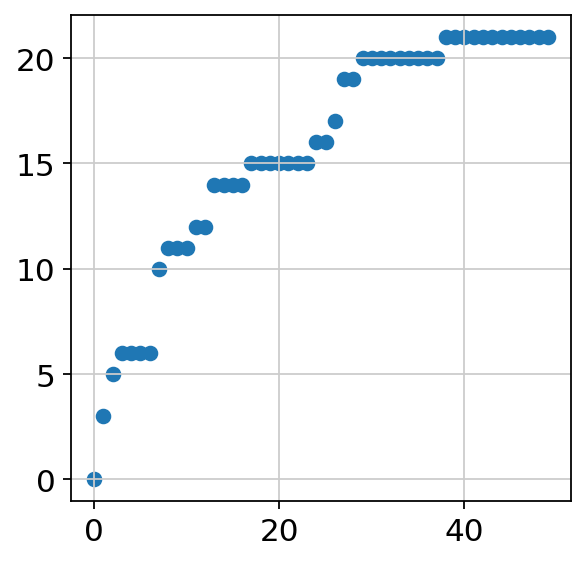

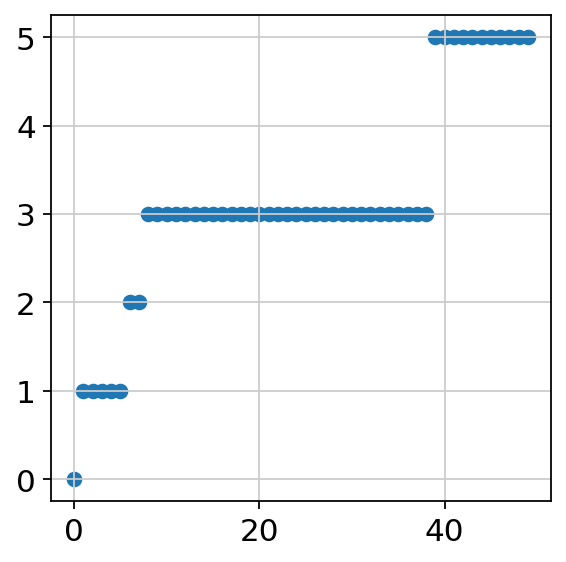

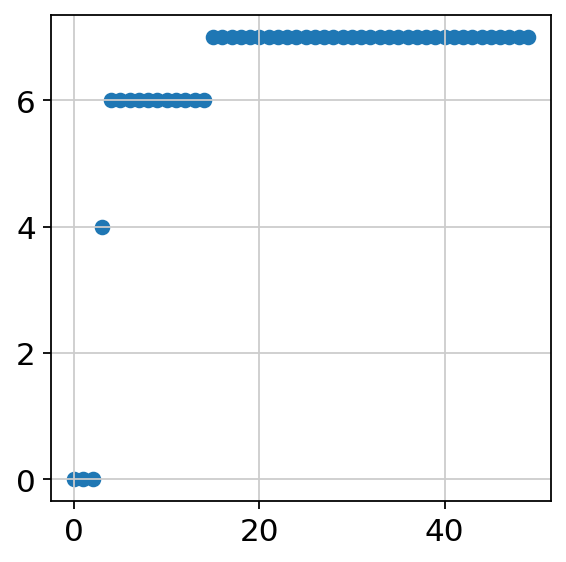

In [ ]:
first_present = get_all_genes(adata_comp, mixture_data["W"][0], 10, present_genes)
print(len(first_present))
print(first_present)

for k in range(0, mixture_data["n_clusters"]):
  plt.scatter([i for i in range(0, 50)], [len(get_all_genes(adata_comp, mixture_data["W"][k], i, present_genes)) for i in range(0, 50)])
  plt.show()
  plt.close()

In [ ]:
# Could use heatmap or cells argument to see if the genes driving the PCs make sense for differentiating
# different cell types